In [42]:
import yfinance as yf

# Replace 'AAPL' with the ticker symbol of the stock you are interested in
ticker_symbol = 'AMZN'

# Specify the start and end dates for the historical data
start_date = '2000-01-01'
end_date = '2023-01-01'

# Download historical data
ohlc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
csv_filename = f'{ticker_symbol}_ohlc_data.csv'
ohlc_data.to_csv(csv_filename)

# Print the first few rows of the data
print(ohlc_data.head())

print(f'Data saved to {csv_filename}')


[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  4.075000  4.478125  3.952344  4.468750   4.468750  322352000
2000-01-04  4.268750  4.575000  4.087500  4.096875   4.096875  349748000
2000-01-05  3.525000  3.756250  3.400000  3.487500   3.487500  769148000
2000-01-06  3.565625  3.634375  3.200000  3.278125   3.278125  375040000
2000-01-07  3.350000  3.525000  3.309375  3.478125   3.478125  210108000
Data saved to AMZN_ohlc_data.csv


In [44]:
data = pd.read_csv('AMZN_ohlc_data.csv')

In [45]:
import talib
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000
...,...,...,...,...,...,...,...
5782,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
5783,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
5784,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
5785,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


Combined Dataset:
         Date      Open      High       Low     Close     Volume  MACD  \
0  2000-01-03  4.075000  4.478125  3.952344  4.468750  322352000   NaN   
1  2000-01-04  4.268750  4.575000  4.087500  4.096875  349748000   NaN   
2  2000-01-05  3.525000  3.756250  3.400000  3.487500  769148000   NaN   
3  2000-01-06  3.565625  3.634375  3.200000  3.278125  375040000   NaN   
4  2000-01-07  3.350000  3.525000  3.309375  3.478125  210108000   NaN   

         RSI        MA       EMA       SMA       STD     Upper     Lower  
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1        NaN  4.282813  4.282813  4.282813  0.185937  4.654687  3.910938  
2   0.000000  3.792188  3.752604  3.792188  0.304688  4.401563  3.182812  
3   0.000000  3.382812  3.436285  3.382812  0.104687  3.592187  3.173438  
4  36.363644  3.378125  3.464178  3.378125  0.100000  3.578125  3.178125  


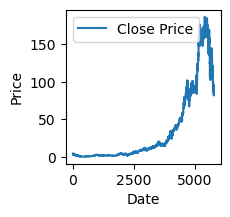

In [47]:
# Calculate MACD
macd, signal, hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate RSI
rsi_period = 2
data['RSI'] = talib.RSI(data['Close'], timeperiod=rsi_period)

# Calculate MA
ma_period = 2
data['MA'] = talib.SMA(data['Close'], timeperiod=ma_period)

# Calculate EMA
ema_period = 2
data['EMA'] = talib.EMA(data['Close'], timeperiod=ema_period)

# Calculate SMA
sma_period = 2
data['SMA'] = talib.SMA(data['Close'], timeperiod=sma_period)

# Calculate STD
std_period = 2
data['STD'] = talib.STDDEV(data['Close'], timeperiod=std_period)

# Calculate Bollinger Bands
bb_period = 2
bb_std = 2
upper_band, _, lower_band = talib.BBANDS(data['Close'], timeperiod=bb_period, nbdevup=bb_std, nbdevdn=bb_std)

# Combine the calculated columns with the original dataset
combined_data = pd.concat([data['Date'], data['Open'], data['High'], data['Low'], data['Close'], data['Volume'],
                           pd.Series(macd, name='MACD'), data['RSI'], data['MA'], data['EMA'], data['SMA'], data['STD'],
                           upper_band.rename('Upper'), lower_band.rename('Lower')], axis=1)


# Print the combined DataFrame
print("Combined Dataset:")
print(combined_data.head())

# Plotting
plt.figure(figsize=(2, 2))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [48]:
combined_data.shape

(5787, 14)

In [49]:
combined_data

,Date,Open,High,Low,Close,Volume,MACD,RSI,MA,EMA,SMA,STD,Upper,Lower
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000,NaN,NaN,4.282813,4.282813,4.282813,0.185937,4.654687,3.910938
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000,NaN,0.000000,3.792188,3.752604,3.792188,0.304688,4.401563,3.182812
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000,NaN,0.000000,3.382812,3.436285,3.382812,0.104687,3.592187,3.173438
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000,NaN,36.363644,3.378125,3.464178,3.378125,0.100000,3.578125,3.178125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,2022-12-23,83.250000,85.779999,82.930000,85.250000,57433700,-3.312041,52.056891,84.520000,85.046952,84.520000,0.730000,85.980000,83.060001
5783,2022-12-27,84.970001,85.349998,83.000000,83.040001,57284000,-3.426447,23.545680,84.145000,83.708984,84.145000,1.105000,86.355000,81.935001
5784,2022-12-28,82.800003,83.480003,81.690002,81.820000,58228600,-3.574356,14.673004,82.430000,82.449661,82.430000,0.610001,83.650002,81.209999
5785,2022-12-29,82.870003,84.550003,82.550003,84.180000,54995900,-3.461244,65.284476,83.000000,83.603221,83.000000,1.180000,85.360001,80.639999


In [51]:
# Save the DataFrame to a CSV file
combined_data.to_csv('AMZN_indicator_data.csv', index=False)


In [52]:
df = pd.read_csv("AMZN_indicator_data.csv", index_col="Date", parse_dates=True)

<AxesSubplot:>

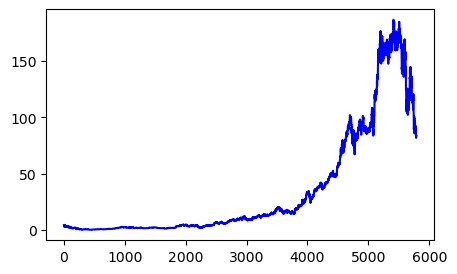

In [53]:
fig, ax = plt.subplots(figsize=(5, 3))
data['Close'].plot(ax=ax, kind='line', color='blue', label='Close')

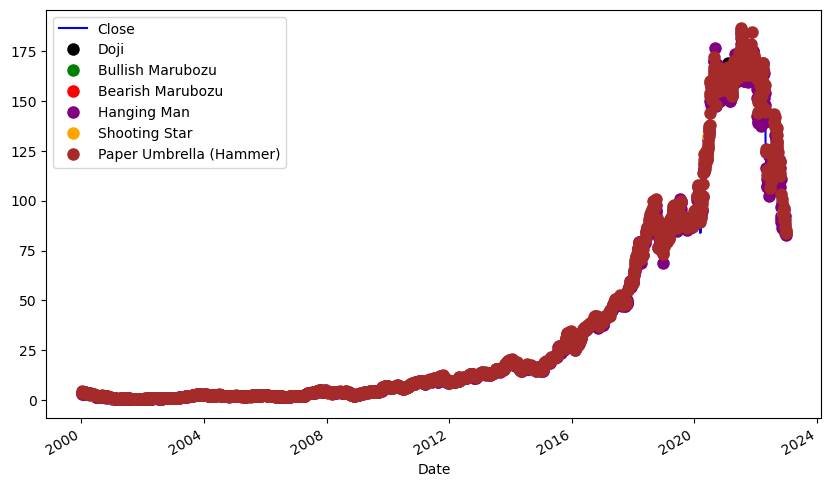

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
df['Close'].plot(ax=ax, kind='line', color='blue', label='Close')

# Plotting candlestick patterns
# Doji
doji = df[df['Open'] == df['Close']]
ax.plot(doji.index, doji['Close'], 'o', color='black', markersize=8, label='Doji')

# Marubozu
marubozu_up = df[(df['Open'] == df['Low']) & (df['Close'] == df['High'])]
marubozu_down = df[(df['Open'] == df['High']) & (df['Close'] == df['Low'])]
ax.plot(marubozu_up.index, marubozu_up['Close'], 'o', color='green', markersize=8, label='Bullish Marubozu')
ax.plot(marubozu_down.index, marubozu_down['Close'], 'o', color='red', markersize=8, label='Bearish Marubozu')

# Hanging Man
hanging_man = df[(df['Close'] < df['Open']) & ((df['Open'] - df['Low']) / (df['High'] - df['Low']) > 0.75)]
ax.plot(hanging_man.index, hanging_man['Close'], 'o', color='purple', markersize=8, label='Hanging Man')

# Shooting Star
shooting_star = df[(df['Close'] > df['Open']) & ((df['High'] - df['Close']) / (df['High'] - df['Low']) > 0.75)]
ax.plot(shooting_star.index, shooting_star['Close'], 'o', color='orange', markersize=8, label='Shooting Star')

# Paper Umbrella (Hammer)
hammer = df[(df['Close'] > df['Open']) & ((df['Close'] - df['Low']) / (df['High'] - df['Low']) > 0.75)]
ax.plot(hammer.index, hammer['Close'], 'o', color='brown', markersize=8, label='Paper Umbrella (Hammer)')

ax.legend()
plt.show()

In [55]:
def identify_patterns(row):
    if row['Open'] == row['Close']:
        return 1  # Code for Doji
    elif (row['Open'] == row['Low']) and (row['Close'] == row['High']):
        return 2  # Code for Bullish Marubozu
    elif (row['Open'] == row['High']) and (row['Close'] == row['Low']):
        return 3  # Code for Bearish Marubozu
    elif (row['Close'] < row['Open']) and ((row['Open'] - row['Low']) / (row['High'] - row['Low']) > 0.75):
        return 4  # Code for Hanging Man
    elif (row['Close'] > row['Open']) and ((row['High'] - row['Close']) / (row['High'] - row['Low']) > 0.75):
        return 5  # Code for Shooting Star
    elif (row['Close'] > row['Open']) and ((row['Close'] - row['Low']) / (row['High'] - row['Low']) > 0.75):
        return 6  # Code for Paper Umbrella (Hammer)
    else:
        return 0  # Code for No Pattern

# Create a new column 'PatternClass' and apply the function to classify patterns
df['PatternClass'] = df.apply(identify_patterns, axis=1)

# Print only the 'PatternClass' column
print(df['PatternClass'])

Date
2000-01-03    6
2000-01-04    0
2000-01-05    0
2000-01-06    4
2000-01-07    6
             ..
2022-12-23    6
2022-12-27    4
2022-12-28    0
2022-12-29    6
2022-12-30    6
Name: PatternClass, Length: 5787, dtype: int64


In [56]:
df['PatternClass'] = df.apply(identify_patterns, axis=1)

# Display the modified DataFrame with the new 'PatternClass' column
df

,Open,High,Low,Close,Volume,MACD,RSI,MA,EMA,SMA,STD,Upper,Lower,PatternClass
Date,,,,,,,,,,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000,NaN,NaN,4.282813,4.282813,4.282813,0.185937,4.654687,3.910938,0
2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000,NaN,0.000000,3.792188,3.752604,3.792188,0.304688,4.401563,3.182812,0
2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000,NaN,0.000000,3.382812,3.436285,3.382812,0.104687,3.592187,3.173438,4
2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000,NaN,36.363644,3.378125,3.464178,3.378125,0.100000,3.578125,3.178125,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,57433700,-3.312041,52.056891,84.520000,85.046952,84.520000,0.730000,85.980000,83.060001,6
2022-12-27,84.970001,85.349998,83.000000,83.040001,57284000,-3.426447,23.545680,84.145000,83.708984,84.145000,1.105000,86.355000,81.935001,4
2022-12-28,82.800003,83.480003,81.690002,81.820000,58228600,-3.574356,14.673004,82.430000,82.449661,82.430000,0.610001,83.650002,81.209999,0


In [57]:
df = df.reset_index()

In [58]:
df = df[df['PatternClass'] != 0]

In [59]:
df.to_csv('AMZNclass_data.csv', index=False)